In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Step 2: Load the Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Clean up extra columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


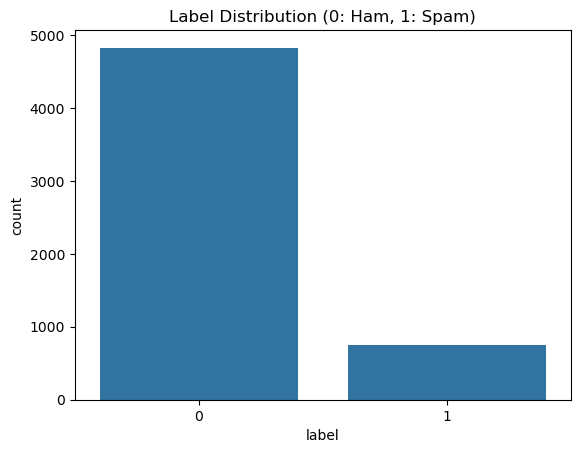

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [4]:
# Step 3: Preprocessing
# Encode target labels (ham = 0, spam = 1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Check class balance
sns.countplot(x=df['label'])
plt.title("Label Distribution (0: Ham, 1: Spam)")
plt.show()

# Show sample messages
df['message'][:5]


In [5]:
# Step 4: Train-Test Split
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# Step 6: Model Training and Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n\n")


In [11]:
# Step 7: Train and Evaluate Models

# Naive Bayes
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Naive Bayes")

# Logistic Regression
lr_model = LogisticRegression()
evaluate_model(lr_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression")

# Support Vector Machine
svm_model = LinearSVC(dual=False)
evaluate_model(svm_model, X_train_tfidf, y_train, X_test_tfidf, y_test, "Support Vector Machine")


=== Naive Bayes ===
Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 37 113]]



=== Logistic Regression ===
Accuracy: 0.9524663677130045

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
 [[962   3]
 [ 50 100]]



=== Support Vector Machine ===
Accuracy: 0.97847533632287

Classification Report:
               pre

In [9]:
# Step 8: Predict on Custom Message
def predict_message(message, model):
    msg_tfidf = tfidf.transform([message])
    prediction = model.predict(msg_tfidf)
    return "Spam" if prediction[0] == 1 else "Ham"

# Try prediction
test_msg = "Congratulations! You've won a $1000 Walmart gift card. Call now to claim."
print(predict_message(test_msg, svm_model))


Spam


In [10]:
# Step 9: Save Model and Vectorizer (Optional)
import pickle

with open('spam_detector_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
